<h1>Lab 04</h1>
<h4>Name : Ambalia Harshit</h4>
<h4>Roll No. : MT001</h4>

<h3>AIM : Introduction to NLTK Library</h3>

In [ ]:
import nltk
import matplotlib.pyplot as plt
import random

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
negative_path = "/content/gdrive/MyDrive/Colab Notebooks/ML_Lab_04_Dataset/neg/"
positive_path = "/content/gdrive/MyDrive/Colab Notebooks/ML_Lab_04_Dataset/pos/"

In [ ]:
# Load the data
import os

def get_all_file_names(folder_path):
  file_names = []
  for root, dirs, files in os.walk(folder_path):
    for file in files:
      file_names.append(os.path.join(root, file))
  return file_names

positive_file_names = get_all_file_names(positive_path)
negative_file_names = get_all_file_names(negative_path)

In [ ]:
print(positive_file_names, len(positive_file_names))
print(negative_file_names, len(negative_file_names))

['/content/gdrive/MyDrive/Colab Notebooks/ML_Lab_04_Dataset/pos/cv000_29590.txt', '/content/gdrive/MyDrive/Colab Notebooks/ML_Lab_04_Dataset/pos/cv001_18431.txt', '/content/gdrive/MyDrive/Colab Notebooks/ML_Lab_04_Dataset/pos/cv002_15918.txt', '/content/gdrive/MyDrive/Colab Notebooks/ML_Lab_04_Dataset/pos/cv003_11664.txt', '/content/gdrive/MyDrive/Colab Notebooks/ML_Lab_04_Dataset/pos/cv004_11636.txt', '/content/gdrive/MyDrive/Colab Notebooks/ML_Lab_04_Dataset/pos/cv005_29443.txt', '/content/gdrive/MyDrive/Colab Notebooks/ML_Lab_04_Dataset/pos/cv006_15448.txt', '/content/gdrive/MyDrive/Colab Notebooks/ML_Lab_04_Dataset/pos/cv007_4968.txt', '/content/gdrive/MyDrive/Colab Notebooks/ML_Lab_04_Dataset/pos/cv008_29435.txt', '/content/gdrive/MyDrive/Colab Notebooks/ML_Lab_04_Dataset/pos/cv009_29592.txt', '/content/gdrive/MyDrive/Colab Notebooks/ML_Lab_04_Dataset/pos/cv010_29198.txt', '/content/gdrive/MyDrive/Colab Notebooks/ML_Lab_04_Dataset/pos/cv011_12166.txt', '/content/gdrive/MyDrive/Col

In [ ]:
def read_all_text_files(path_array):
  content_array = []
  for path in path_array:
    with open(path, "r") as f:
      file_content = f.read().splitlines()
    content_array.append(file_content)
  return content_array

positive_data = read_all_text_files(positive_file_names)
negative_data = read_all_text_files(negative_file_names)

In [ ]:
print(type(positive_data), len(positive_data))
print(type(negative_data), len(negative_data))


<class 'list'> 1000
<class 'list'> 1000


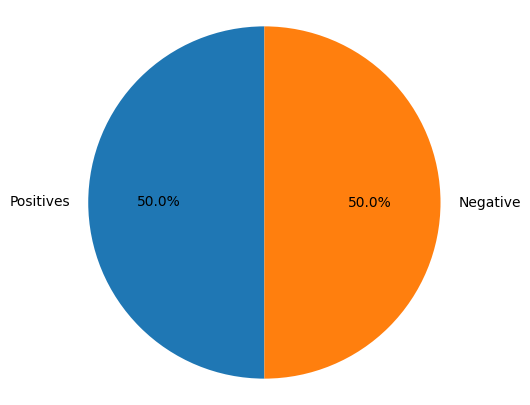

In [ ]:
# Plot the positive and negative datasets
fig = plt.figure(figsize=(5, 5))
labels = 'Positives', 'Negative'
sizes = [len(positive_data), len(negative_data)]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

For NLP, the preprocessing steps are comprised of the following tasks:

• Tokenizing the string

• Lowercasing

• Removing stop words and punctuation

• Stemming

In [ ]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [ ]:
def convert_list_of_lists_to_list_of_strings(list_of_lists):
  list_of_strings = []
  for sublist in list_of_lists:
    list_of_strings.append(sublist[0])
  return list_of_strings

positive_string_array = convert_list_of_lists_to_list_of_strings(positive_data)
negative_string_array = convert_list_of_lists_to_list_of_strings(negative_data)

In [ ]:
print(type(positive_string_array), len(positive_string_array))
print(type(negative_string_array), len(negative_string_array))

<class 'list'> 1000
<class 'list'> 1000




> Removing punctuation



In [ ]:
import re

def remove_punctuation(list_of_string):
  punctuation_marks = [',', '.', '(', ')', '!', '@', '#', '$', '%', '^', '&', '*', '<', '>', '?', ';', ':', '-', '_', '+', '-', '"', "'"]
  list_of_strings = []
  for sublist in list_of_string:
    if isinstance(sublist, str):
      for punctuation_mark in punctuation_marks:
        sublist = sublist.replace(punctuation_mark, '')
        sublist = re.sub(r'\d+', '', sublist)
      list_of_strings.append(sublist)
  return list_of_strings

positive_without_punctuation = remove_punctuation(positive_string_array)
negative_without_punctuation = remove_punctuation(negative_string_array)


In [ ]:
print(type(positive_without_punctuation), len(positive_without_punctuation))
print(type(positive_without_punctuation), len(positive_without_punctuation))

<class 'list'> 1000
<class 'list'> 1000




> Tokenizing the strings




In [ ]:
from nltk.tokenize import TweetTokenizer

def tokenize_the_string(list_of_string):
  tokenizer = TweetTokenizer(preserve_case=False)
  list_of_tokens = []
  for sublist in list_of_string:
    tweet_tokens = tokenizer.tokenize(sublist)
    list_of_tokens.append(tweet_tokens)
  return list_of_tokens

tokenized_positive = tokenize_the_string(positive_without_punctuation)
tokenized_negative = tokenize_the_string(negative_without_punctuation)


In [ ]:
print(type(tokenized_positive), len(tokenized_positive))
print(type(tokenized_negative), len(tokenized_negative))

<class 'list'> 1000
<class 'list'> 1000




> Removing stop words



In [ ]:
nltk.download('stopwords')
stopwords_english = stopwords.words('english')
print(stopwords_english)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def remove_stop_words(pn_tokens):
  string_after_removing_stop_words = []
  for tokens in pn_tokens:
    temp_list = []
    for word in tokens:
      if (word not in stopwords_english):
        temp_list.append(word)
    string_after_removing_stop_words.append(temp_list)
  return string_after_removing_stop_words

removed_stop_positive_tokens = remove_stop_words(tokenized_positive)
removed_stop_negative_tokens = remove_stop_words(tokenized_negative)

In [ ]:
print(removed_stop_positive_tokens[15])
print(tokenized_positive[15])

['plot', 'young', 'man', 'loves', 'heavy', 'metal', 'music', 'especially', 'band', 'steel', 'dragon', 'hes', 'devoted', 'tribute', 'band', 'sings', 'gets', 'launched', 'stardom', 'real', 'group', 'get', 'rid', 'lead', 'singer', 'call', 'take', 'place']
['plot', 'a', 'young', 'man', 'who', 'loves', 'heavy', 'metal', 'music', 'and', 'especially', 'the', 'band', 'steel', 'dragon', 'to', 'whom', 'hes', 'devoted', 'a', 'tribute', 'band', 'in', 'which', 'he', 'sings', 'gets', 'launched', 'into', 'stardom', 'when', 'the', 'real', 'group', 'get', 'rid', 'of', 'their', 'lead', 'singer', 'and', 'call', 'on', 'him', 'to', 'take', 'his', 'place']


In [ ]:
import nltk
nltk.download('wordnet')
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatizer_function(tokens):
  after_lemmatizer = []
  for tk in tokens:
    temp_lem = []
    for word in tk:
      lem_words = wordnet_lemmatizer.lemmatize(word)# stemming word
      temp_lem.append(lem_words) # append to the list
    after_lemmatizer.append(temp_lem)
  return after_lemmatizer

lemmatized_positive_tokens = lemmatizer_function(removed_stop_positive_tokens)
lemmatized_negative_tokens = lemmatizer_function(removed_stop_negative_tokens)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
lemmatized_positive_tokens

[['film',
  'adapted',
  'comic',
  'book',
  'plenty',
  'success',
  'whether',
  'theyre',
  'superheroes',
  'batman',
  'superman',
  'spawn',
  'geared',
  'toward',
  'kid',
  'casper',
  'arthouse',
  'crowd',
  'ghost',
  'world',
  'there',
  'never',
  'really',
  'comic',
  'book',
  'like',
  'hell'],
 ['every',
  'movie',
  'come',
  'along',
  'suspect',
  'studio',
  'every',
  'indication',
  'stinker',
  'everybodys',
  'surprise',
  'perhaps',
  'even',
  'studio',
  'film',
  'becomes',
  'critical',
  'darling'],
 ['youve', 'got', 'mail', 'work', 'alot', 'better', 'deserves'],
 ['jaw',
  'rare',
  'film',
  'grab',
  'attention',
  'show',
  'single',
  'image',
  'screen'],
 ['moviemaking',
  'lot',
  'like',
  'general',
  'manager',
  'nfl',
  'team',
  'postsalary',
  'cap',
  'era',
  'youve',
  'got',
  'know',
  'allocate',
  'resource'],
 ['june',
  'selftaught',
  'idealistic',
  'yet',
  'pragmatic',
  'young',
  'man',
  'became',
  'age',
  'first',
  '

In [ ]:
lemmatized_negative_tokens

[['plot', 'two', 'teen', 'couple', 'go', 'church', 'party', 'drink', 'drive'],
 ['happy', 'bastard', 'quick', 'movie', 'review'],
 ['movie',
  'like',
  'make',
  'jaded',
  'movie',
  'viewer',
  'thankful',
  'invention',
  'timex',
  'indiglo',
  'watch'],
 ['quest',
  'camelot',
  'warner',
  'bros',
  'first',
  'featurelength',
  'fullyanimated',
  'attempt',
  'steal',
  'clout',
  'disney',
  'cartoon',
  'empire',
  'mouse',
  'reason',
  'worried'],
 ['synopsis',
  'mentally',
  'unstable',
  'man',
  'undergoing',
  'psychotherapy',
  'save',
  'boy',
  'potentially',
  'fatal',
  'accident',
  'fall',
  'love',
  'boy',
  'mother',
  'fledgling',
  'restauranteur'],
 ['capsule',
  'planet',
  'mar',
  'police',
  'taking',
  'custody',
  'accused',
  'murderer',
  'face',
  'title',
  'menace'],
 ['ask', 'mm', 'eight', 'millimeter', 'really'],
 ['thats', 'exactly', 'long', 'movie', 'felt'],
 ['call', 'road', 'trip', 'walking', 'wounded'],
 ['plot',
  'young',
  'french',
  